# Visualizing spatio-chemical filters with pythreejs
## Installation:
For running this notebook, the following additional packages are required:

pythreejs (https://pythreejs.readthedocs.io/en/stable/)

ipywebrtc==0.5.0

ipywidgets==7.5.1  

Installation with pip should work with a recent jupyter version. Reboot the jupyter notebook afterwards.



## Important: Cells must be executed one at time (rather than with Cell -> Run All)



# Calculate filter specificities
The first step is to calculate the filter specificities.
For the atomic filters, we must simply extract the neighborhood embedding layer parameters from the keras model object.
For the amino acid filters, since the amino-acid specificity of individual gaussian components is *non-linear*, we must first determine it on a set of test proteins.

This is done as follows:
1. Calculate, for each gaussian component of each filter, the distribution of activities.
2. Identify the top-1\% activating residues.
3. Determine their amino acid type, secondary structure and accessible surface area.
4. Determine the mean activity across the top-activating residues.


Then, for a given filter, display the gaussians with highest mean activity (threshold1 = 33\% of the maximum mean activity), and show attribute specificity as inset.

## Calculating the amino acid filter specificities takes about 1 hour on a laptop
To avoid this step and visualize only the atom filters, specify only_atom=True

In [1]:
from visualizations import show_3d_filters,weight_logo_3d
from utilities import dataset_utils


model_name = 'ScanNet_PAI_noMSA_0'
dataset_name = 'BCE_fold1'
list_origins = dataset_utils.read_labels('datasets/BCE/labels_fold1.txt')[0]

filter_specificities = show_3d_filters.calculate_filter_specificities(
    model_name,
    dataset_name = dataset_name,
    dataset_origins = list_origins,
    biounit=False,
    ncores=4,
    only_atom=False,
    top_percent = 5,
    fresh = True,
    Lmax = 1024

)




Using TensorFlow backend.
/opt/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/py36/lib/python3.6/site-packag

primary
secondary
Accessible surface area
Discrepancy between lengthes, discarding example 186 190
Discrepancy between lengthes, discarding example 195 196
Discrepancy between lengthes, discarding example 186 190
Discrepancy between lengthes, discarding example 187 191
Discrepancy between lengthes, discarding example 186 190



/Users/jerometubiana/Documents/GitHub/ScanNet/utilities/dataset_utils.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  list_labels = np.array(list_labels)
/Users/jerometubiana/Documents/GitHub/ScanNet/utilities/dataset_utils.py:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  list_resids = np.array(list_resids)






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
point_clouds_atom (InputLayer)  (None, 11264, 3)     0                                            
__________________________________________________________________________________________________
frame_indices_atom (InputLayer) (None, 9216, 3)      0                                            
__________________________________________________________________________________________________
masked_point_clouds_atom (Maski (None, 11264, 3)     0           point_clouds_atom[0][0]          
__________________________________________________________________________________________________
masked_frame_indices_atom (Mask (None, 9

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
point_clouds_atom (InputLayer)  (None, 11264, 3)     0                                            
__________________________________________________________________________________________________
frame_indices_atom (InputLayer) (None, 9216, 3)      0                                            
__________________________________________________________________________________________________
masked_point_clouds_atom (Maski (None, 11264, 3)     0           point_clouds_atom[0][0]          
__________________________________________________________________________________________________
masked_frame_indices_atom (Mask (None, 9216, 3)      0           frame_indices_atom[0][0]         
____________________________________________________________________________________________

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
point_clouds_atom (InputLayer)  (None, 11264, 3)     0                                            
__________________________________________________________________________________________________
frame_indices_atom (InputLayer) (None, 9216, 3)      0                                            
__________________________________________________________________________________________________
masked_point_clouds_atom (Maski (None, 11264, 3)     0           point_clouds_atom[0][0]          
__________________________________________________________________________________________________
masked_frame_indices_atom (Mask (None, 9216, 3)      0           frame_indices_atom[0][0]         
____________________________________________________________________________________________

Generating groups...
Grouped 985 examples in 413 groups
Grouping and padding...
Performing prediction...
413/413 [==============================] - 501s 1s/step
Ungrouping and unpadding...
prediction done!
Generating groups...
Grouped 985 examples in 413 groups
Grouping and padding...
Performing prediction...


/Users/jerometubiana/Documents/GitHub/ScanNet/utilities/wrappers.py:404: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([output_ for output_ in outputs])


413/413 [==============================] - 544s 1s/step
Ungrouping and unpadding...
prediction done!


In [6]:
filter_specificities['filter_activity']['percentiles'].shape

(100, 128)

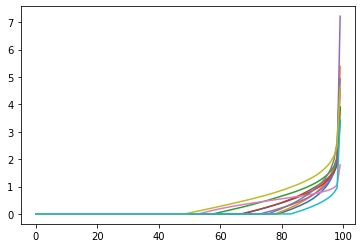

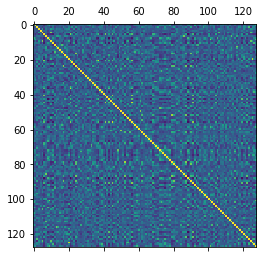

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(filter_specificities['filter_activity']['percentiles'][:,:10] )

plt.matshow(filter_specificities['filter_activity']['correlation'])

## Instantiate sphere geometry
This cell must be executed first

In [2]:
sg = weight_logo_3d.make_sphere_geometry(30)

# Interactive visualization of one amino acid filter

ValueError: shapes (0,) and (3,3) not aligned: 0 (dim 0) != 3 (dim 0)

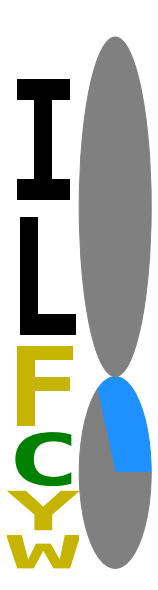

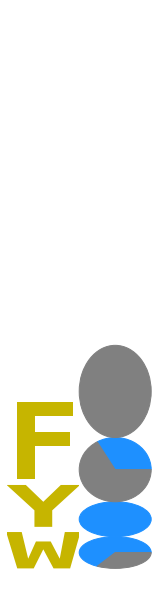

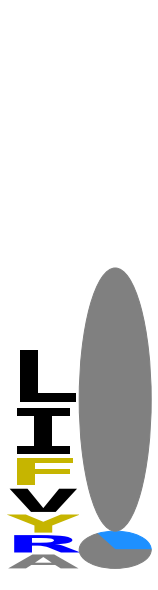

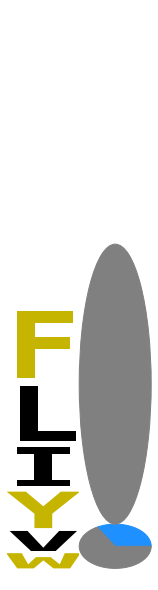

In [3]:
renderer = show_3d_filters.plot_aminoacid_filter(filter_specificities,10,sg=sg);
display(renderer)

# Interactive visualization of one atomic filter

In [ ]:
renderer = show_3d_filters.plot_atomic_filter(filter_specificities,20,sg=sg);
display(renderer)

# Filter visualization with custom camera position

In [ ]:
renderer = show_3d_filters.plot_atomic_filter(filter_specificities,30,sg=sg,
                                             camera_position=[-0.3, 0.6, 1.0]);

display(renderer)


# Filter visualization with custom camera position, take screenshot

In [ ]:
renderer = show_3d_filters.plot_atomic_filter(filter_specificities,30,sg=sg,
                                             camera_position=[-0.3, 0.6, 1.0]);
weight_logo_3d.make_screenshot(renderer,'screenshot_filter.png')
display(renderer)

